### 📄 Notebook Description — Multivariate Analysis

In this notebook, I performed multivariate analysis on the combined ODI dataset (`CombinedcleanedOdiStats.csv`).  
Using **Seaborn** and **Matplotlib**, I generated correlation heatmaps and multivariate comparison plots to study how multiple features interact with each other.

This analysis includes both:
- **Existing features** (Runs, Average, StrikeRate, Boundaries, etc.)
- **Engineered features** (ConversionRate, Landmarks, BoundariesHit, Ratings, etc.)

The goal of this notebook is to understand deeper relationships between multiple variables at the same time and identify which features contribute most to overall player performance.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for clean visuals
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

In [2]:
df=pd.read_csv("addedfeaturesodistats.csv")
df

,Unnamed: 0,PlayerName,Matches,Innings,Average,StrikeRate,HighestScore,4s,6s,50s,...,Boundary%,Landmarks,BoundariesHit,RunsRating,AvgRating,SRRating,LandmarksRating,BoundariesRating,TotalRating,Rating10
0,0,Sachin Tendulkar,463,452,44.83,86.23,200,2016.0,195.0,96,...,50.11,145,2211.0,5,5,2,5,5,22,8.8
1,1,Virat Kohli,305,293,57.71,93.26,183,1332.0,152.0,75,...,43.77,126,1484.0,5,5,3,5,5,23,9.2
2,2,Rohit Sharma,276,268,49.22,92.66,264,1066.0,349.0,59,...,55.92,92,1415.0,5,5,3,5,5,23,9.2
3,3,Sourav Ganguly,311,300,41.02,73.70,183,1122.0,190.0,72,...,49.53,94,1312.0,5,5,2,5,5,22,8.8
4,4,Rahul Dravid,344,318,39.16,71.23,153,950.0,42.0,83,...,37.21,95,992.0,5,5,2,5,5,22,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,366,Bindeshwari Goyal,4,1,0.00,25.00,1,NaN,NaN,0,...,NaN,0,NaN,1,1,1,1,5,9,3.6
367,367,Samantha Lobatto,3,2,0.00,12.50,1,NaN,NaN,0,...,NaN,0,NaN,1,1,1,1,5,9,3.6
368,368,Anjali Sharma,3,3,0.33,NaN,1,NaN,NaN,0,...,NaN,0,NaN,1,1,5,1,5,13,5.2
369,369,Rita Patel,1,1,1.00,NaN,1,NaN,NaN,0,...,NaN,0,NaN,1,1,5,1,5,13,5.2


In [35]:
df = df.drop(columns=['Unnamed: 0'])
df

,PlayerName,Matches,Innings,Average,StrikeRate,HighestScore,4s,6s,50s,100s,...,Boundary%,Landmarks,BoundariesHit,RunsRating,AvgRating,SRRating,LandmarksRating,BoundariesRating,TotalRating,Rating10
0,Sachin Tendulkar,463,452,44.83,86.23,200,2016.0,195.0,96,49,...,50.11,145,2211.0,5,5,2,5,5,22,8.8
1,Virat Kohli,305,293,57.71,93.26,183,1332.0,152.0,75,51,...,43.77,126,1484.0,5,5,3,5,5,23,9.2
2,Rohit Sharma,276,268,49.22,92.66,264,1066.0,349.0,59,33,...,55.92,92,1415.0,5,5,3,5,5,23,9.2
3,Sourav Ganguly,311,300,41.02,73.70,183,1122.0,190.0,72,22,...,49.53,94,1312.0,5,5,2,5,5,22,8.8
4,Rahul Dravid,344,318,39.16,71.23,153,950.0,42.0,83,12,...,37.21,95,992.0,5,5,2,5,5,22,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,Bindeshwari Goyal,4,1,0.00,25.00,1,NaN,NaN,0,0,...,NaN,0,NaN,1,1,1,1,5,9,3.6
367,Samantha Lobatto,3,2,0.00,12.50,1,NaN,NaN,0,0,...,NaN,0,NaN,1,1,1,1,5,9,3.6
368,Anjali Sharma,3,3,0.33,NaN,1,NaN,NaN,0,0,...,NaN,0,NaN,1,1,5,1,5,13,5.2
369,Rita Patel,1,1,1.00,NaN,1,NaN,NaN,0,0,...,NaN,0,NaN,1,1,5,1,5,13,5.2


C:\Users\tejas\AppData\Local\Temp\ipykernel_17936\2305967486.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


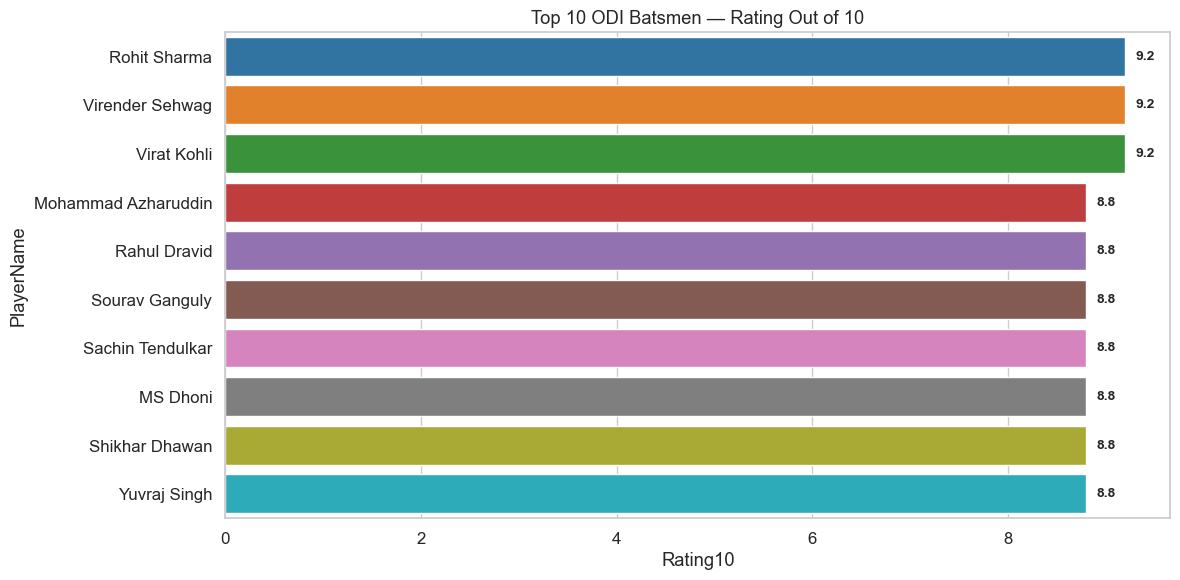

In [7]:
# ------------------ TOP 10 ODI BATSMEN (RATING OUT OF 10) ------------------

df_top_rate = df.sort_values(by='Rating10', ascending=False).head(10)

plt.figure(figsize=(12,6))

# Create as many unique colors as number of players
unique_colors = sns.color_palette("tab10", len(df_top_rate))  # 10 different colors

ax = sns.barplot(
    data=df_top_rate,
    y='PlayerName',
    x='Rating10',
    palette=unique_colors,
    orient='h'
)

# Add rating values on bars
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 0.1,
        p.get_y() + p.get_height() / 2,
        f"{width:.1f}",
        ha='left',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

plt.title("Top 10 ODI Batsmen — Rating Out of 10")
plt.tight_layout()

# Save the image
plt.savefig("top10_odi_batsmen_rating_horizontal_3.1.png", dpi=300, bbox_inches='tight')

plt.show()

In [10]:
# ------------------ GREAT ODI BATSMEN TABLE ------------------

great_odi = df[(df['Average'] > 45) & 
               (df['StrikeRate'] >= 75) & 
               (df['Innings'] > 25)]

cols = ['PlayerName', 'Gender', 'Matches', 'Innings', 'Runs',
        'Average', 'StrikeRate', '100s', '50s', '4s', '6s']

great_odi = great_odi[cols].sort_values(by='StrikeRate', ascending=False).reset_index(drop=True)

print(great_odi)

        PlayerName Gender  Matches  Innings   Runs  Average  StrikeRate  100s  \
0     Shubman Gill    Men       58       58   2818    56.36       99.22     8   
1     Shreyas Iyer    Men       73       67   2917    47.81       99.01     5   
2      Virat Kohli    Men      305      293  14255    57.71       93.26    51   
3     Rohit Sharma    Men      276      268  11370    49.22       92.66    33   
4  Smriti Mandhana  Women      117      117   5322    48.38       90.52    14   
5         KL Rahul    Men       88       81   3092    48.31       88.41     7   
6         MS Dhoni    Men      350      297  10773    50.57       87.56    10   
7    Ambati Rayudu    Men       55       50   1694    47.05       79.04     3   

   50s      4s     6s  
0   15   318.0   60.0  
1   23   270.0   72.0  
2   75  1332.0  152.0  
3   59  1066.0  349.0  
4   34   642.0   74.0  
5   18   238.0   69.0  
6   73   826.0  229.0  
7   10   145.0   30.0  


C:\Users\tejas\AppData\Local\Temp\ipykernel_17936\1427534810.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


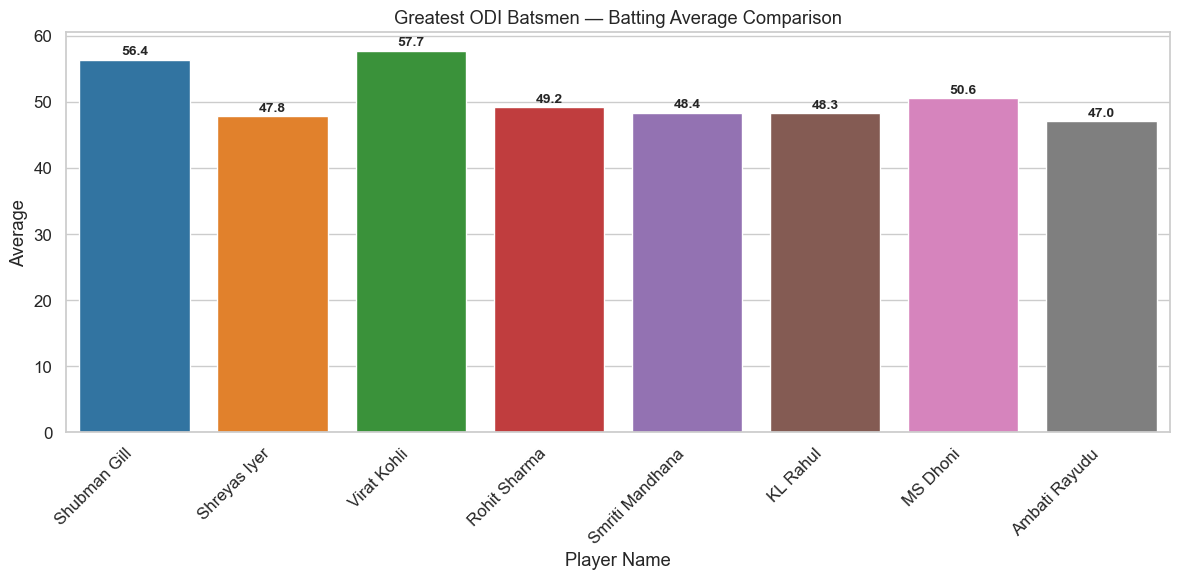

In [13]:
plt.figure(figsize=(12,6))

# Create unique colors for each bar
unique_colors = sns.color_palette("tab10", len(great_odi))

ax = sns.barplot(
    data=great_odi,
    x='PlayerName',
    y='Average',
    palette=unique_colors
)

# Add average values on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 0.3,                 # slightly above the bar
        f"{height:.1f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.xticks(rotation=45, ha='right')
plt.title("Greatest ODI Batsmen — Batting Average Comparison")
plt.xlabel("Player Name")
plt.ylabel("Average")
plt.tight_layout()
plt.savefig("Greatest ODI Batsmen — Batting Average Comparison_3.2.png", dpi=300, bbox_inches='tight')
plt.show()

C:\Users\tejas\AppData\Local\Temp\ipykernel_17936\3128454800.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


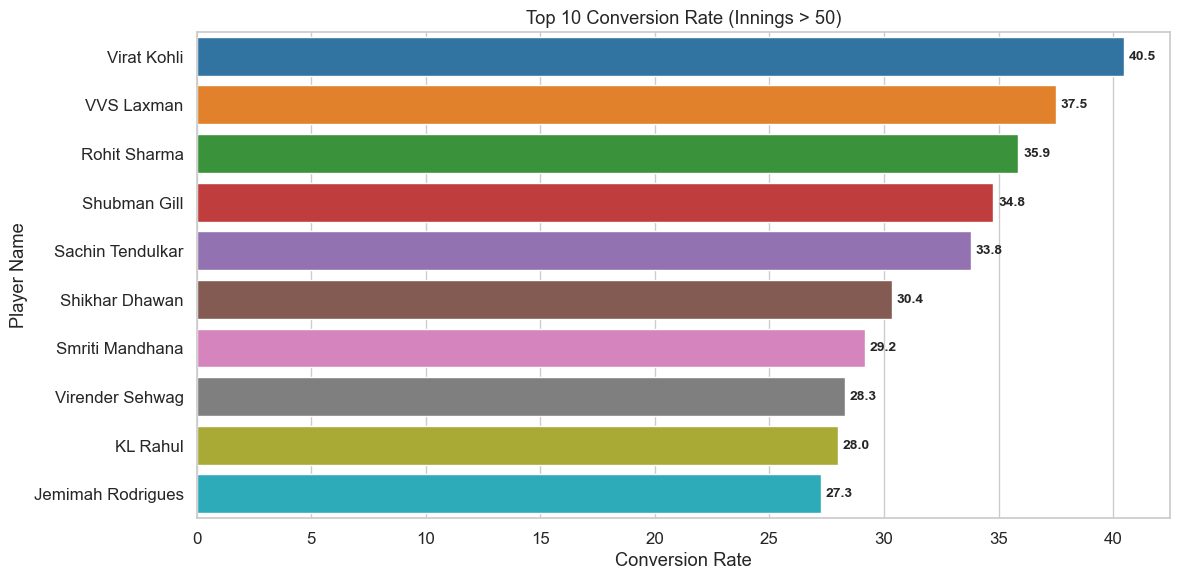

In [15]:
# ------------------ TOP 10 BY CONVERSION RATE ------------------

plt.figure(figsize=(12,6))

df_filtered = df[df['Innings'] > 50]
df_top10 = df_filtered.sort_values(by='ConversionRate', ascending=False).head(10)

# Unique colors for each bar
unique_colors = sns.color_palette("tab10", len(df_top10))

ax = sns.barplot(
    data=df_top10,
    y='PlayerName',
    x='ConversionRate',
    palette=unique_colors,
    orient='h'
)

# Add values at the end of bars
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 0.2,
        p.get_y() + p.get_height() / 2,
        f"{width:.1f}",
        ha='left',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

# Title WITHOUT 3.3
plt.title("Top 10 Conversion Rate (Innings > 50)")
plt.xlabel("Conversion Rate")
plt.ylabel("Player Name")
plt.tight_layout()

# Save WITH 3.3 in the filename
plt.savefig("3.3_top10_conversion_rate.png", dpi=300, bbox_inches='tight')

plt.show()

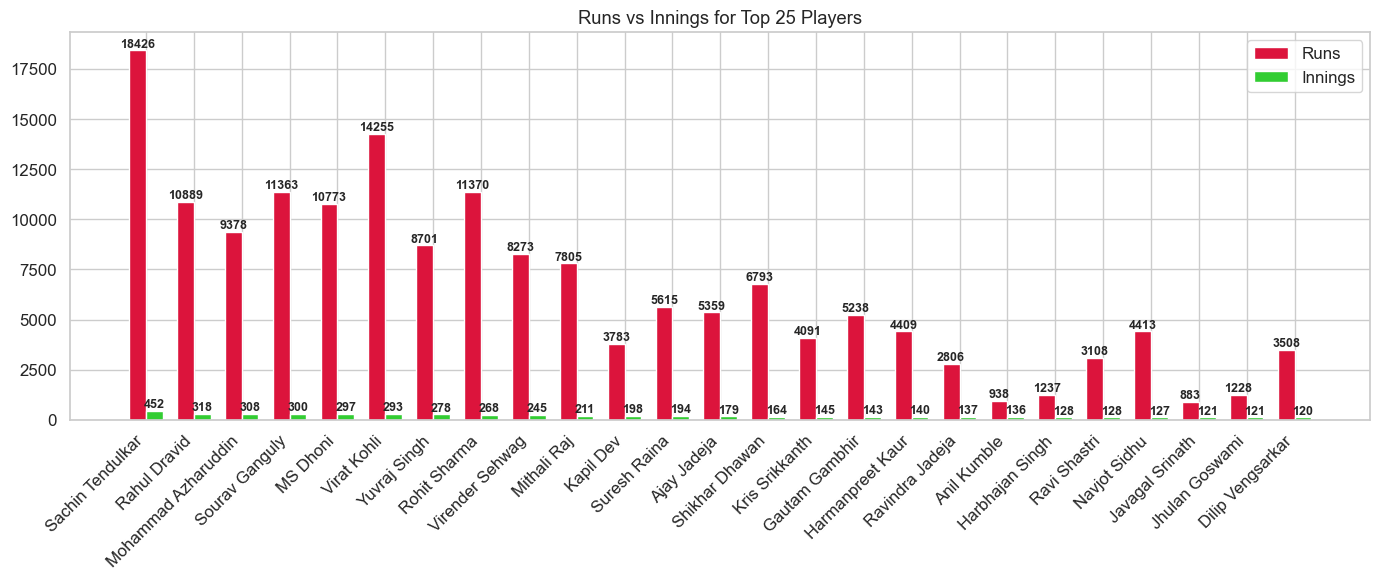

In [17]:
# ------------------ RUNS VS INNINGS ------------------

df_top = df.sort_values(by='Innings', ascending=False).head(25)

import numpy as np
x = np.arange(len(df_top))
width = 0.35

plt.figure(figsize=(14,6))
bars1 = plt.bar(x - width/2, df_top['Runs'], width, label='Runs', color='crimson')
bars2 = plt.bar(x + width/2, df_top['Innings'], width, label='Innings', color='limegreen')

plt.title("Runs vs Innings for Top 25 Players")
plt.xticks(x, df_top['PlayerName'], rotation=45, ha='right')
plt.legend()

# -------- Add labels above bars --------
for bar in bars1:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 10,
        f"{int(height)}",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

for bar in bars2:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 10,
        f"{int(height)}",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

plt.tight_layout()

# -------- Save figure --------
plt.savefig("3.4_runs_vs_innings.png", dpi=300, bbox_inches='tight')

plt.show()


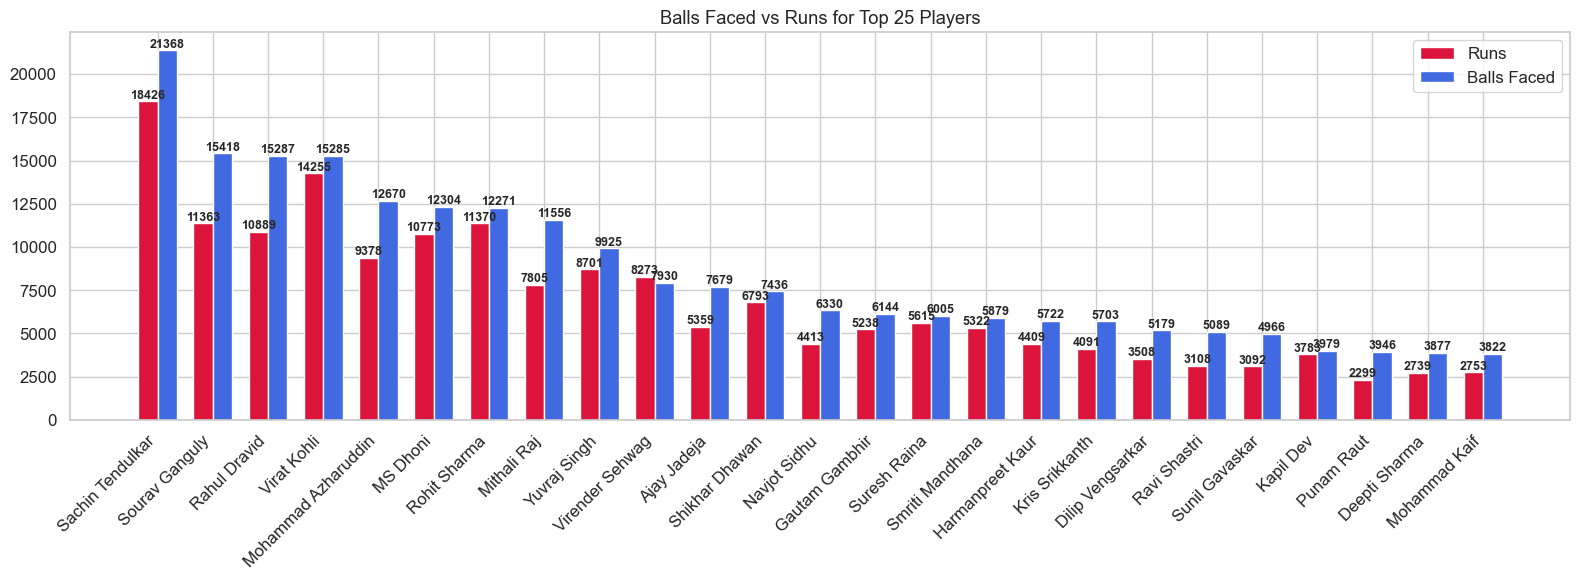

In [19]:
# ------------------ BALLS FACED VS RUNS ------------------

df_top = df.sort_values(by='BallsFaced', ascending=False).head(25)

x = np.arange(len(df_top))
width = 0.35

plt.figure(figsize=(16,6))
bars1 = plt.bar(x - width/2, df_top['Runs'], width, label='Runs', color='crimson')
bars2 = plt.bar(x + width/2, df_top['BallsFaced'], width, label='Balls Faced', color='royalblue')

plt.title("Balls Faced vs Runs for Top 25 Players")
plt.xticks(x, df_top['PlayerName'], rotation=45, ha='right')
plt.legend()

# -------- Add labels above bars --------
for bar in bars1:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 10,
        f"{int(height)}",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

for bar in bars2:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 10,
        f"{int(height)}",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

plt.tight_layout()

# -------- Save figure --------
plt.savefig("3.5_ballsfaced_vs_runs.png", dpi=300, bbox_inches='tight')

plt.show()

<Figure size 1200x600 with 0 Axes>

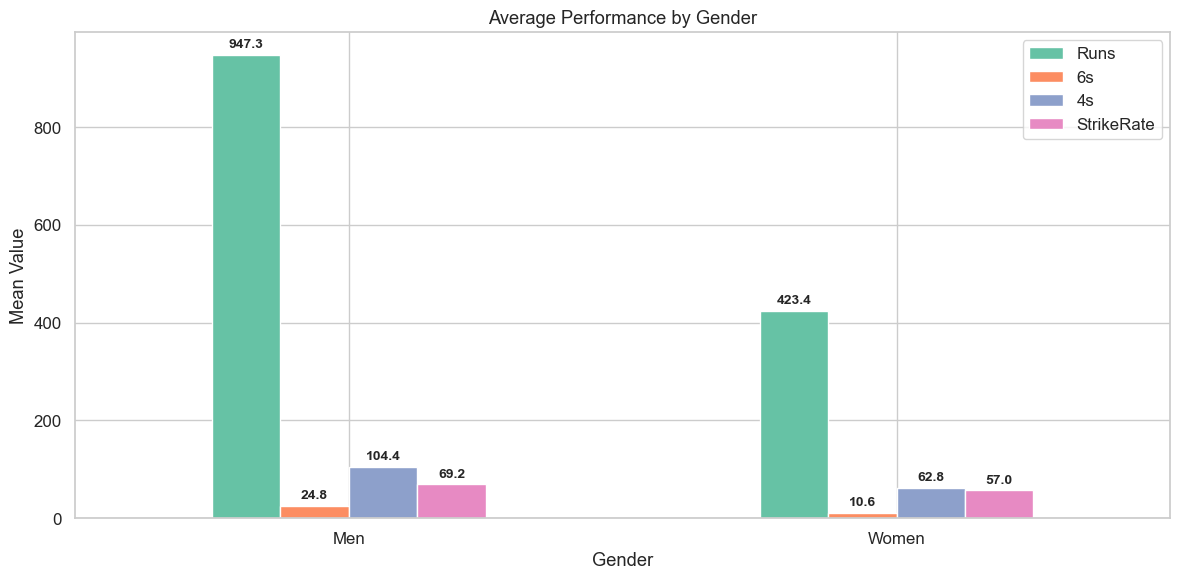

In [28]:
# ------------------ GENDER PERFORMANCE COMPARISON ------------------

grouped = df.groupby('Gender')[['Runs', '6s', '4s', 'StrikeRate']].mean().reset_index()

plt.figure(figsize=(12,6))   # Same height as previous charts

ax = grouped.plot(
    x='Gender', 
    kind='bar', 
    figsize=(12,6), 
    title='Average Performance by Gender',
    legend=True
)

plt.ylabel("Mean Value")
plt.xticks(rotation=0)

# ----- Add labels above bars -----
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", fontsize=10, padding=3, weight='bold')

plt.tight_layout()

# -------- Save figure --------
plt.savefig("3.6_gender_performance.png", dpi=300, bbox_inches='tight')

plt.show()

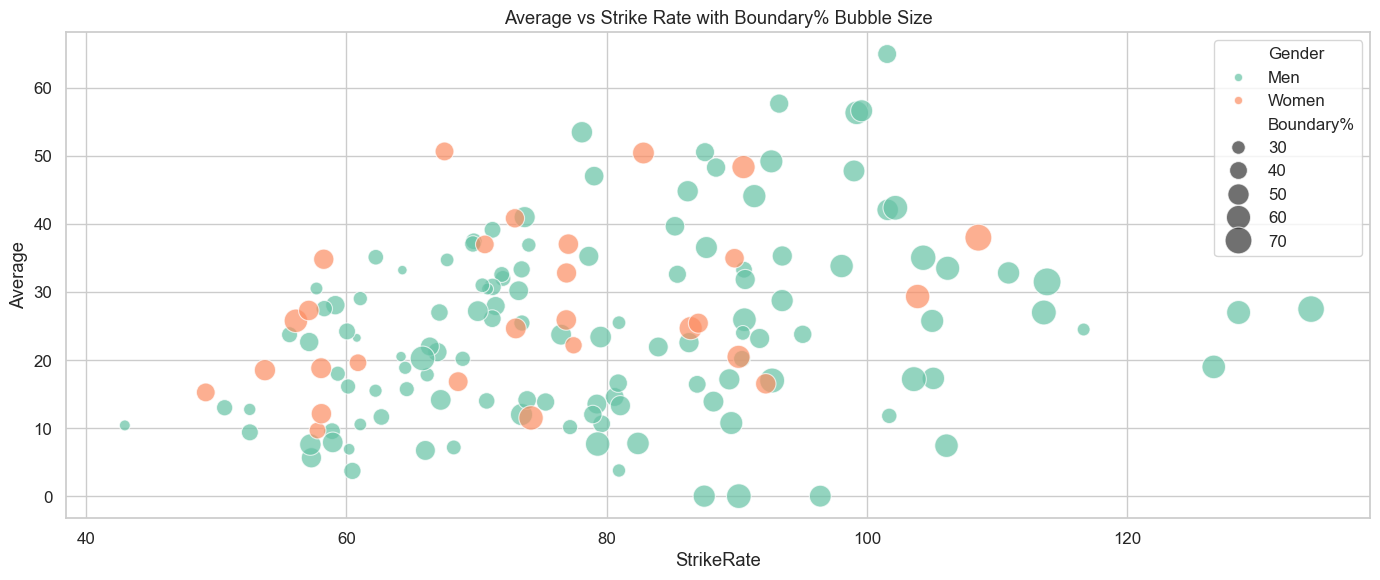

In [30]:

# ------------------ STRIKE RATE vs AVERAGE ------------------

plt.figure(figsize=(14,6))   # Same height style as previous charts

sns.scatterplot(
    data=df,
    x='StrikeRate',
    y='Average',
    hue='Gender',
    size='Boundary%',
    sizes=(40, 400),
    alpha=0.7
)

plt.title("Average vs Strike Rate with Boundary% Bubble Size")
plt.tight_layout()

# -------- Save figure --------
plt.savefig("3.7_strikerate_vs_average.png", dpi=300, bbox_inches='tight')

plt.show()

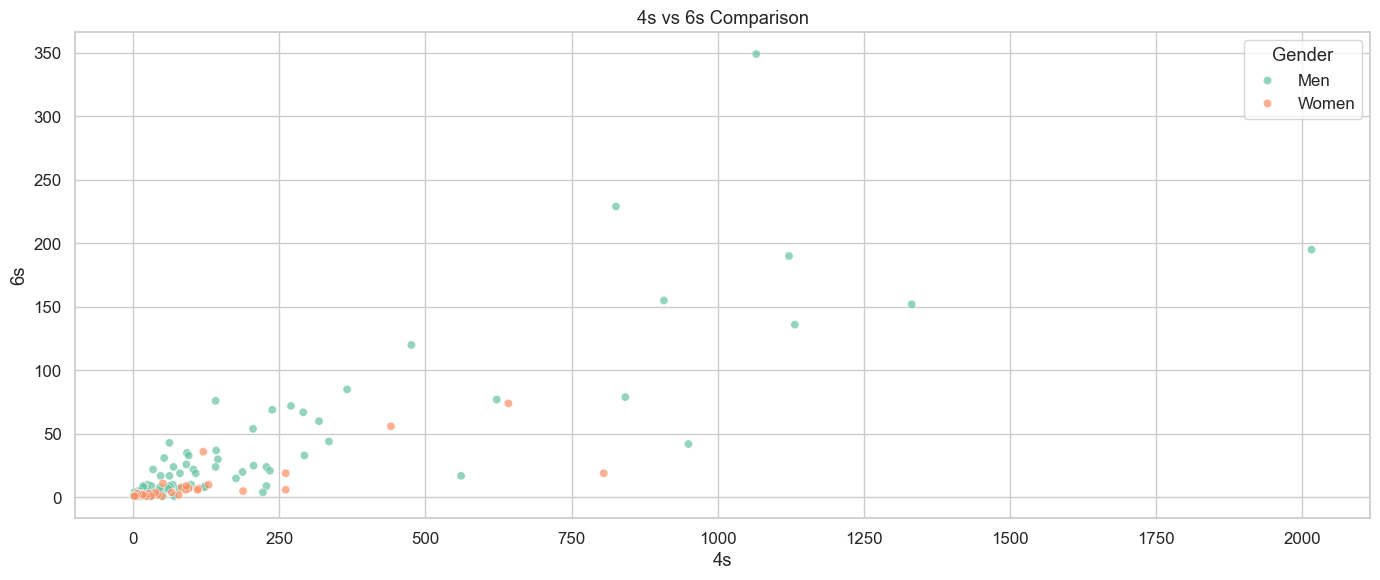

In [31]:
# ------------------ 4s VS 6s SCATTER ------------------

plt.figure(figsize=(14,6))   # Same height style as other saved plots

sns.scatterplot(
    data=df,
    x='4s',
    y='6s',
    hue='Gender',
    alpha=0.7
)

plt.title("4s vs 6s Comparison")
plt.tight_layout()

# -------- Save figure --------
plt.savefig("3.8_4s_vs_6s.png", dpi=300, bbox_inches='tight')

plt.show()

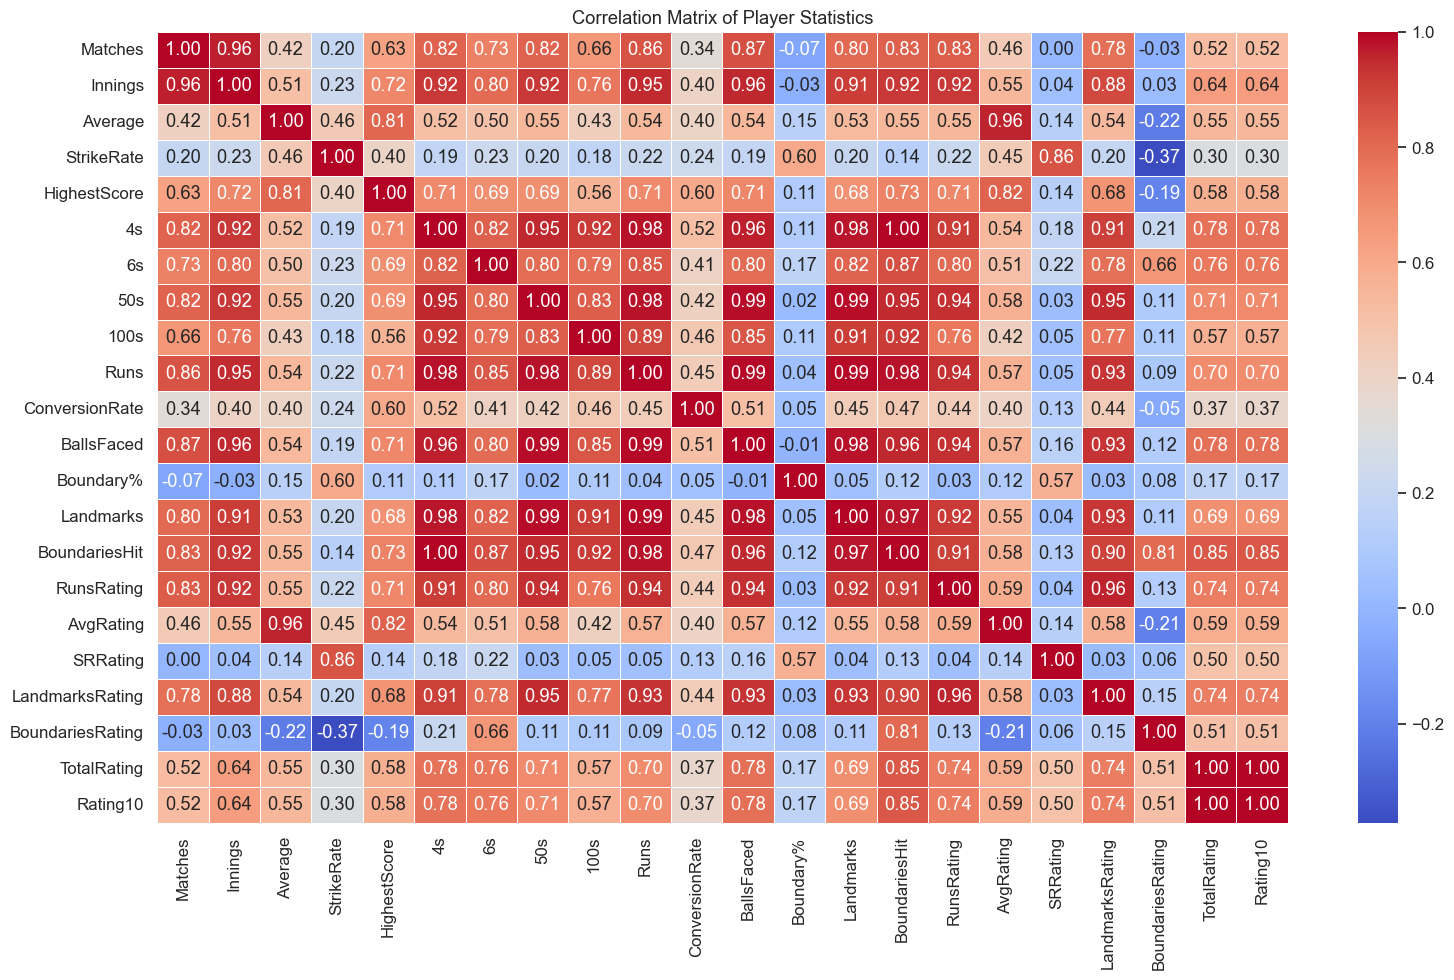

In [40]:
# ------------------ CORRELATION MATRIX ------------------

# Drop Unnamed column if still present
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(16,10))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Matrix of Player Statistics")
plt.tight_layout()

# -------- Save figure --------
plt.savefig("3.9_correlation_matrix.png", dpi=300, bbox_inches='tight')

plt.show()

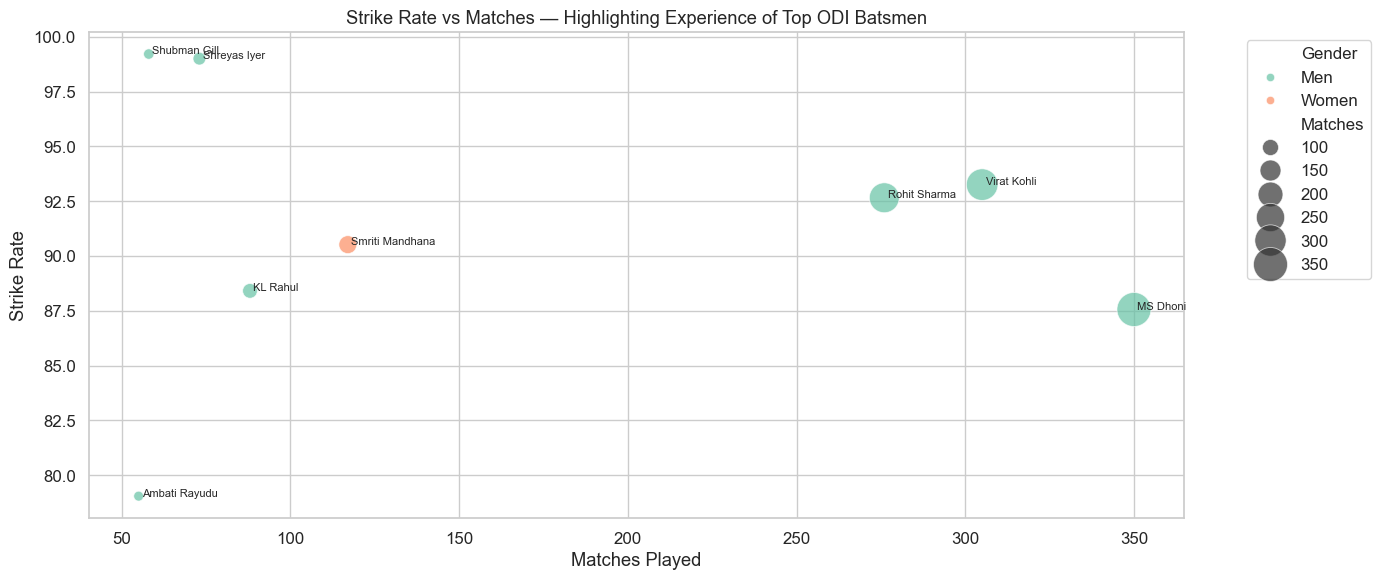

In [42]:
# ------------------ STRIKE RATE vs MATCHES (TOP ODI BATSMEN) ------------------

plt.figure(figsize=(14,6))  # Bigger for Medium

ax = sns.scatterplot(
    data=great_odi,
    x='Matches',
    y='StrikeRate',
    hue='Gender',
    size='Matches',
    sizes=(50, 600),
    alpha=0.7
)

# ----- Add player name labels -----
for i, row in great_odi.iterrows():
    plt.text(
        row['Matches'] + 1,          # slight shift right
        row['StrikeRate'],
        row['PlayerName'],
        fontsize=8
    )

plt.title("Strike Rate vs Matches — Highlighting Experience of Top ODI Batsmen")
plt.xlabel("Matches Played")
plt.ylabel("Strike Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# ----- Save as PNG (3.10) -----
plt.savefig("3.10_strikerate_vs_matches.png", dpi=300, bbox_inches='tight')

plt.show()

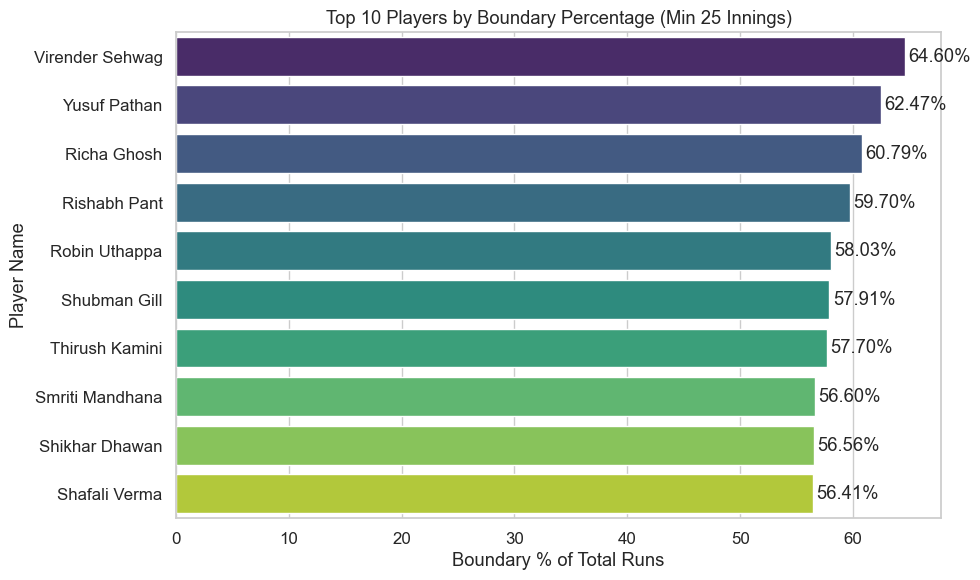

In [43]:
# Filter players with at least 25 innings
filtered_df = df[df['Innings'] >= 25].copy()

# Create Boundary Percentage column
filtered_df['Boundary%'] = ((filtered_df['4s'] * 4 + filtered_df['6s'] * 6) / filtered_df['Runs']) * 100

# Handle division by zero
filtered_df['Boundary%'] = filtered_df['Boundary%'].fillna(0)

# Get top 10 players by Boundary Percentage
boundary_top = filtered_df.sort_values(by='Boundary%', ascending=False).head(10)

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(
    data=boundary_top,
    x='Boundary%',
    y='PlayerName',
    hue='PlayerName',
    legend=False,
    palette='viridis'
)
plt.title('Top 10 Players by Boundary Percentage (Min 25 Innings)')
plt.xlabel('Boundary % of Total Runs')
plt.ylabel('Player Name')

# Add text labels on bars
for index, value in enumerate(boundary_top['Boundary%']):
    plt.text(value + 0.3, index, f"{value:.2f}%", va='center')

plt.tight_layout()
plt.savefig("3.11_strikerate_vs_matches.png", dpi=300, bbox_inches='tight')
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PlayerName        371 non-null    object 
 1   Matches           371 non-null    int64  
 2   Innings           371 non-null    int64  
 3   Average           371 non-null    float64
 4   StrikeRate        322 non-null    float64
 5   HighestScore      371 non-null    int64  
 6   4s                254 non-null    float64
 7   6s                154 non-null    float64
 8   50s               371 non-null    int64  
 9   100s              371 non-null    int64  
 10  Runs              371 non-null    int64  
 11  Gender            371 non-null    object 
 12  ConversionRate    371 non-null    float64
 13  BallsFaced        322 non-null    float64
 14  Boundary%         151 non-null    float64
 15  Landmarks         371 non-null    int64  
 16  BoundariesHit     151 non-null    float64
 1

In [37]:
df

,PlayerName,Matches,Innings,Average,StrikeRate,HighestScore,4s,6s,50s,100s,...,Boundary%,Landmarks,BoundariesHit,RunsRating,AvgRating,SRRating,LandmarksRating,BoundariesRating,TotalRating,Rating10
0,Sachin Tendulkar,463,452,44.83,86.23,200,2016.0,195.0,96,49,...,50.11,145,2211.0,5,5,2,5,5,22,8.8
1,Virat Kohli,305,293,57.71,93.26,183,1332.0,152.0,75,51,...,43.77,126,1484.0,5,5,3,5,5,23,9.2
2,Rohit Sharma,276,268,49.22,92.66,264,1066.0,349.0,59,33,...,55.92,92,1415.0,5,5,3,5,5,23,9.2
3,Sourav Ganguly,311,300,41.02,73.70,183,1122.0,190.0,72,22,...,49.53,94,1312.0,5,5,2,5,5,22,8.8
4,Rahul Dravid,344,318,39.16,71.23,153,950.0,42.0,83,12,...,37.21,95,992.0,5,5,2,5,5,22,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,Bindeshwari Goyal,4,1,0.00,25.00,1,NaN,NaN,0,0,...,NaN,0,NaN,1,1,1,1,5,9,3.6
367,Samantha Lobatto,3,2,0.00,12.50,1,NaN,NaN,0,0,...,NaN,0,NaN,1,1,1,1,5,9,3.6
368,Anjali Sharma,3,3,0.33,NaN,1,NaN,NaN,0,0,...,NaN,0,NaN,1,1,5,1,5,13,5.2
369,Rita Patel,1,1,1.00,NaN,1,NaN,NaN,0,0,...,NaN,0,NaN,1,1,5,1,5,13,5.2
